# Unsupervised Learning Project
### Data Description:

The data concerns city-cycle fuel consumption in miles per gallon

### Domain:

Automobile

### Context:

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

### Attribute Information:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

### Learning Outcomes:

● ExploratoryDataAnalysis

● Clustering

● SupervisedLearning

### Objective:

Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’

### Steps and tasks:
1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)
4. Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

# SOLUTION :

## Import libraries and load data

In [1]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [2]:
mpg_df = pd.read_csv("cars-dataset.csv")

## Checking the data

In [3]:
mpg_df.sample(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
20,peugeot 504,4,110.0,87,2672,17.5,70,25.0
395,dodge rampage,4,135.0,84,2295,11.6,82,32.0
324,datsun 210,4,85.0,65,2110,19.2,80,40.8
93,plymouth fury gran sedan,8,318.0,150,4237,14.5,73,14.0
177,audi 100ls,4,115.0,95,2694,15.0,75,23.0
262,chevrolet monte carlo landau,8,305.0,145,3425,13.2,78,19.2
35,chevrolet chevelle malibu,6,250.0,100,3329,15.5,71,17.0
156,pontiac catalina,8,400.0,170,4668,11.5,75,16.0
36,ford torino 500,6,250.0,88,3302,15.5,71,19.0
168,ford pinto,4,140.0,83,2639,17.0,75,23.0


In [4]:
mpg_df.shape

(398, 8)

In [5]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
# Check if any NULL in the data
pd.DataFrame( mpg_df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
car name,0
cyl,0
disp,0
hp,0
wt,0
acc,0
yr,0
mpg,0


In [7]:
# drop the car name column as it is useless for the model
mpg_df = mpg_df.drop('car name', axis=1)

In [8]:
mpg_df

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,27.0
394,4,97.0,52,2130,24.6,82,44.0
395,4,135.0,84,2295,11.6,82,32.0
396,4,120.0,79,2625,18.6,82,28.0


In [9]:
mpg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [10]:
# Note:  HP column is missing the describe output. That indicates something is not right with that column

In [11]:
#Check if the hp column contains anything other than digits
temp = pd.DataFrame(mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
# in temp dataframe

temp[temp['hp'] == False]   # from temp take only those rows where hp has false

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [12]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"

In [13]:
mpg_df = mpg_df.replace('?', np.nan)

In [14]:
mpg_df[mpg_df.isnull().any(axis=1)]

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,NaN,2046,19.0,71,25.0
126,6,200.0,NaN,2875,17.0,74,21.0
330,4,85.0,NaN,1835,17.3,80,40.9
336,4,140.0,NaN,2905,14.3,80,23.6
354,4,100.0,NaN,2320,15.8,81,34.5
374,4,151.0,NaN,3035,20.5,82,23.0


In [15]:
# Now replace NaN with median of those values

In [16]:
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [17]:
mpg_df.dtypes

cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [18]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')  # converting the hp column from object  type to float

In [19]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [20]:
mpg_df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.804203
hp,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.773453
wt,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,1.000000


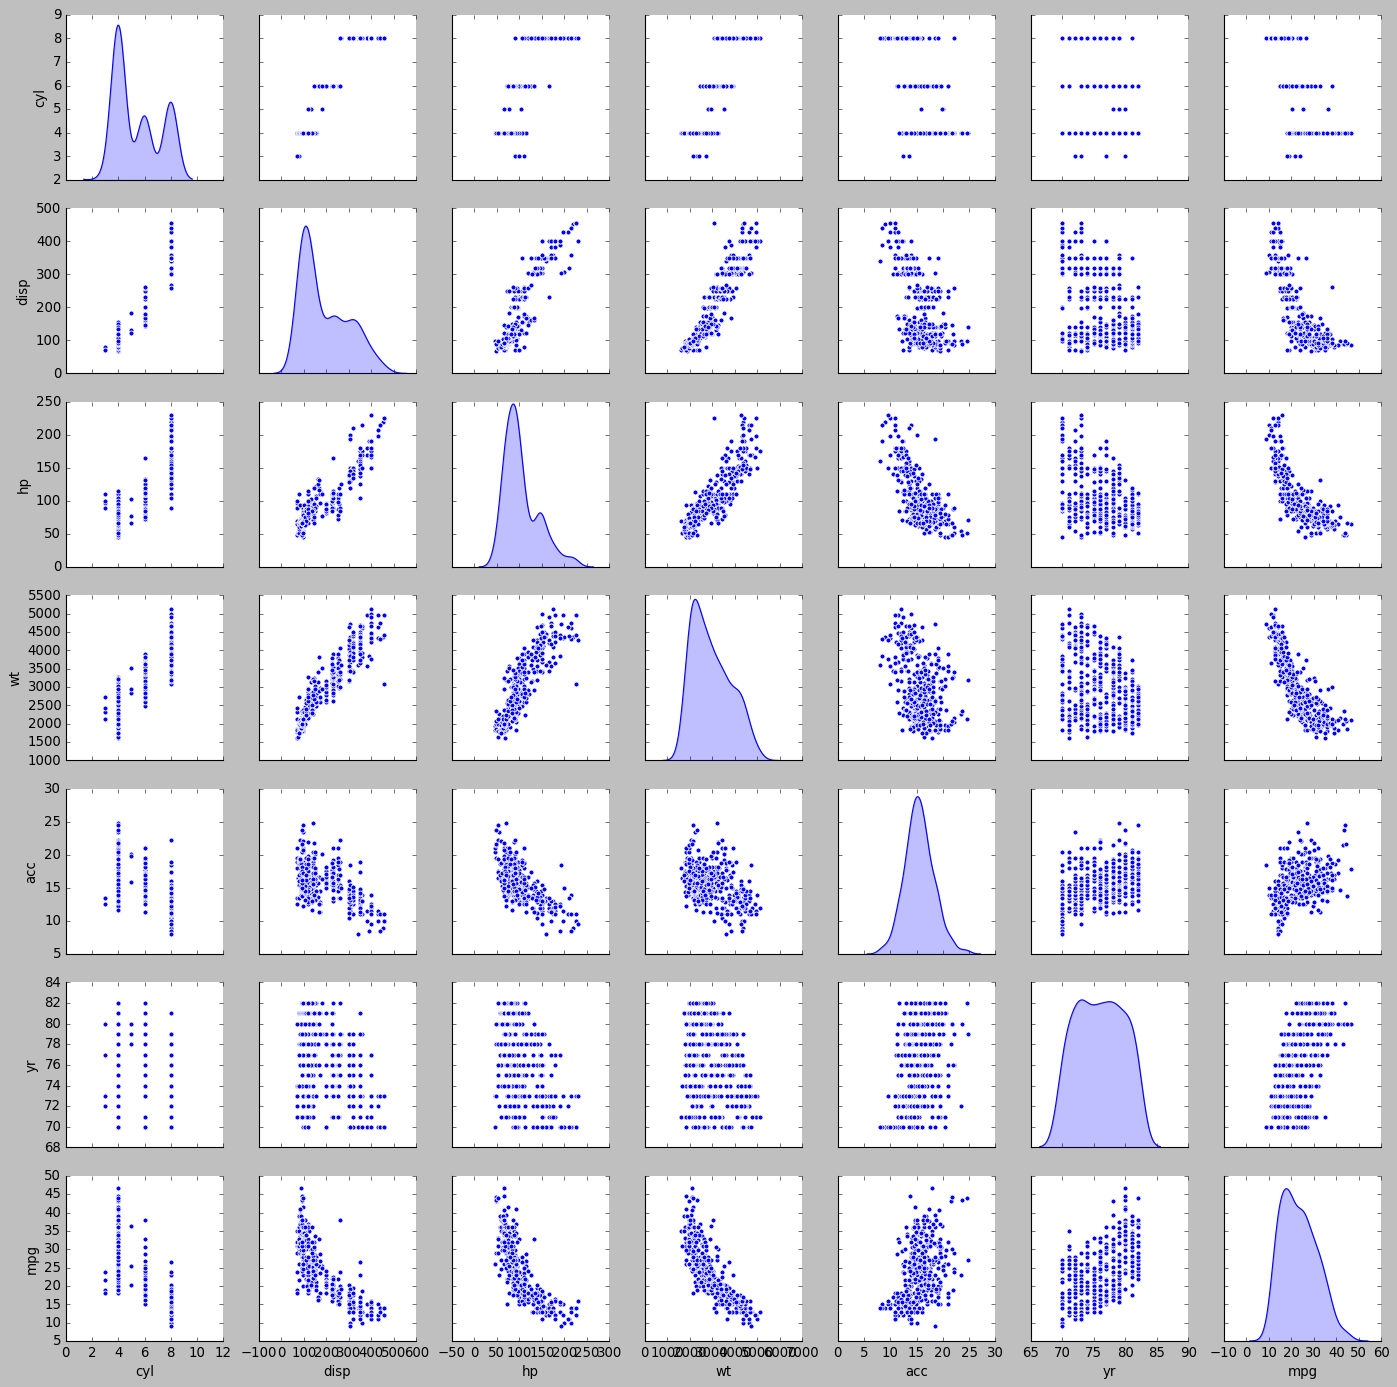

In [21]:
sns.pairplot(mpg_df, diag_kind='kde') 

In [22]:
# From the scatter plat it seems that there are 3 clear peaks in cyl column.Some other features have 2 peaks. So there can be 3 to 6 clusters.
# Also note that numner of cylenders, displacement, hp, wt has some kind of negative correlation with mpg
# year of manufacture seems to have a positive correlation with mpg - it may be due to recent technology used or due to age of the vehicle
# Acc seems to have very weak correlation with mpg

In [23]:
# We can safely drop the 'acc' column now
mpg_df = mpg_df.drop("acc", axis=1) 

In [24]:
# Derive a new feature 'age' of vehicles from existing 'yr'
mpg_df['age'] = 2020 - (1900 + mpg_df['yr'])

In [25]:
mpg_df

,cyl,disp,hp,wt,yr,mpg,age
0,8,307.0,130.0,3504,70,18.0,50
1,8,350.0,165.0,3693,70,15.0,50
2,8,318.0,150.0,3436,70,18.0,50
3,8,304.0,150.0,3433,70,16.0,50
4,8,302.0,140.0,3449,70,17.0,50
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,82,27.0,38
394,4,97.0,52.0,2130,82,44.0,38
395,4,135.0,84.0,2295,82,32.0,38
396,4,120.0,79.0,2625,82,28.0,38


In [26]:
# We can safely drop the 'yr' column now
mpg_df = mpg_df.drop("yr", axis=1) 
mpg_df

,cyl,disp,hp,wt,mpg,age
0,8,307.0,130.0,3504,18.0,50
1,8,350.0,165.0,3693,15.0,50
2,8,318.0,150.0,3436,18.0,50
3,8,304.0,150.0,3433,16.0,50
4,8,302.0,140.0,3449,17.0,50
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,27.0,38
394,4,97.0,52.0,2130,44.0,38
395,4,135.0,84.0,2295,32.0,38
396,4,120.0,79.0,2625,28.0,38


In [27]:
# Lets scale the data before further proceeing 
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler
# Creating an object for the StandardScaler function
X = StandardScaler()
scaled_df = X.fit_transform(mpg_df)

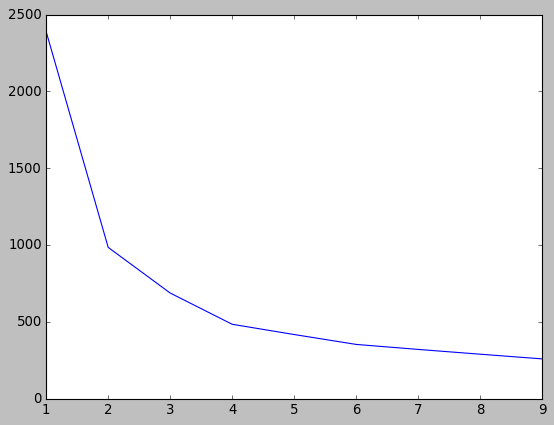

In [28]:
from sklearn.cluster import KMeans
wss =[] 
for i in range(1,10):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
plt.plot(range(1,10), wss)

### From the elbow graph we can see that we can pick 2 clusters.
NOTE: Though visually earlier we saw there could be 3 clusters, but that is just a guidance. Elbow graph is scientifically more reliable.

In [53]:
k_means = KMeans(n_clusters = 2,random_state=5)
k_means.fit(scaled_df)
labels = k_means.labels_

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(scaled_df,labels)

0.4854649317659183

In [55]:
mpg_df["Cluster"] = labels
mpg_df.sample(10)

,cyl,disp,hp,wt,mpg,age,Cluster
92,8,351.0,158.0,4363,13.0,47,1
235,4,97.0,75.0,2265,26.0,43,0
392,4,151.0,90.0,2950,27.0,38,0
347,4,85.0,65.0,1975,37.0,39,0
313,4,151.0,90.0,2678,28.0,40,0
156,8,400.0,170.0,4668,16.0,45,1
136,8,302.0,140.0,4141,16.0,46,1
144,4,76.0,52.0,1649,31.0,46,0
154,6,250.0,72.0,3432,15.0,45,1
129,4,79.0,67.0,1950,31.0,46,0


In [56]:
mpg_df.Cluster.value_counts().sort_index()

0    237
1    161
Name: Cluster, dtype: int64

In [57]:
Cluster0 = mpg_df[mpg_df['Cluster']==0]
Cluster1 = mpg_df[mpg_df['Cluster']==1]
Cluster2 = mpg_df[mpg_df['Cluster']==2]
Cluster3 = mpg_df[mpg_df['Cluster']==3]

In [58]:
Cluster0.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,237.0,4.215190,0.651027,3.0,4.0,4.0,4.0,6.0
disp,237.0,118.284810,34.002182,68.0,97.0,111.0,140.0,262.0
hp,237.0,81.232068,15.864994,46.0,70.0,82.0,91.0,132.0
wt,237.0,2385.206751,388.557179,1613.0,2085.0,2300.0,2670.0,3530.0
mpg,237.0,28.481435,5.944731,18.0,24.0,27.9,32.3,46.6
age,237.0,42.856540,3.710454,38.0,40.0,42.0,46.0,50.0
Cluster,237.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [59]:
Cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,161.0,7.279503,0.963141,6.0,6.0,8.0,8.0,8.0
disp,161.0,304.037267,67.798035,156.0,250.0,304.0,350.0,455.0
hp,161.0,138.267081,36.119032,72.0,105.0,140.0,155.0,230.0
wt,161.0,3831.894410,550.135013,2634.0,3415.0,3785.0,4274.0,5140.0
mpg,161.0,16.203106,3.019715,9.0,14.0,16.0,18.0,26.6
age,161.0,45.658385,2.985602,39.0,43.0,46.0,48.0,50.0
Cluster,161.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


### Linear Regression Model for Cluster 0

In [60]:
Cluster0_df = Cluster0.drop("Cluster", axis=1) 

In [61]:
# Crete a Feature set X and Label set Y
X = Cluster0_df.drop("mpg", axis=1) 
y = Cluster0_df["mpg"].copy()

# do a test tran split of 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

# invoke the LinearRegression function and find the bestfit model on training data

regression_model_C0 = LinearRegression()
regression_model_C0.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
regression_model_C0.score(X_train, y_train)

0.6833236221780215

In [63]:
# Model Test score 
regression_model_C0.score(X_test, y_test)

0.6591578540414655

In [64]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_C0.coef_[idx]))

# intercept for the model

intercept = regression_model_C0.intercept_
print("The intercept for our model for Cluster 0 is {}".format(intercept))

The coefficient for cyl is 1.247119082566257
The coefficient for disp is -0.04288564834344486
The coefficient for hp is -0.07225586074131324
The coefficient for wt is -0.006117574653740415
The coefficient for age is -0.8645646898817206
The intercept for our model for Cluster 0 is 85.8783651032125


### Linear Regression Model for Cluster 1

In [65]:
Cluster1_df = Cluster1.drop("Cluster", axis=1) 

In [66]:
# Crete a Feature set X and Label set Y
X = Cluster1_df.drop("mpg", axis=1) 
y = Cluster1_df["mpg"].copy()

# do a test tran split of 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

# invoke the LinearRegression function and find the bestfit model on training data

regression_model_C1 = LinearRegression()
regression_model_C1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
regression_model_C1.score(X_train, y_train)

0.6416825612287109

In [68]:
# Model score - R2 or coeff of determinant
regression_model_C1.score(X_test, y_test)

0.7366444740768183

In [69]:
# Coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} in Cluster 1 is {}".format(col_name, regression_model_C1.coef_[idx]))
    
# intercept for the model

intercept = regression_model_C1.intercept_
print("The intercept for our model for Cluster 1 is {}".format(intercept))

The coefficient for cyl in Cluster 1 is -0.2051443950032976
The coefficient for disp in Cluster 1 is 0.006280629321287578
The coefficient for hp in Cluster 1 is -0.020211613623254708
The coefficient for wt in Cluster 1 is -0.002621281972870863
The coefficient for age in Cluster 1 is -0.4127580613953935
The intercept for our model for Cluster 1 is 47.36823853660409


### END OF ASSIGNMENT